In [5]:
import cv2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

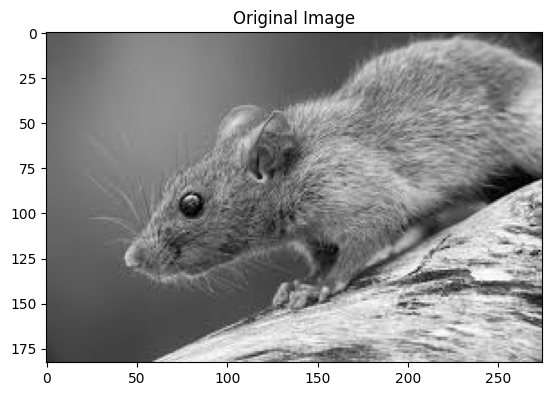

In [7]:
image = cv2.imread('rat.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

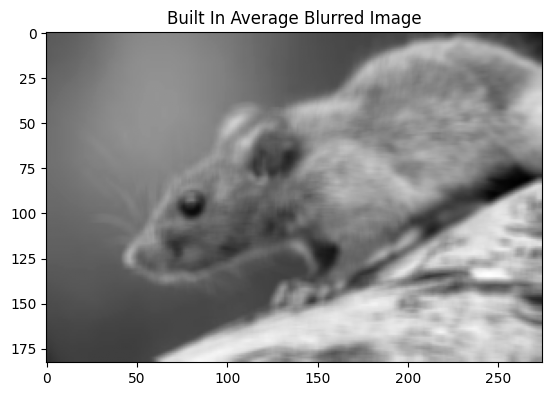

In [8]:
avg_blurred = cv2.blur(image, (5, 5))

plt.imshow(avg_blurred, cmap='gray')
plt.title("Built In Average Blurred Image")
plt.show()


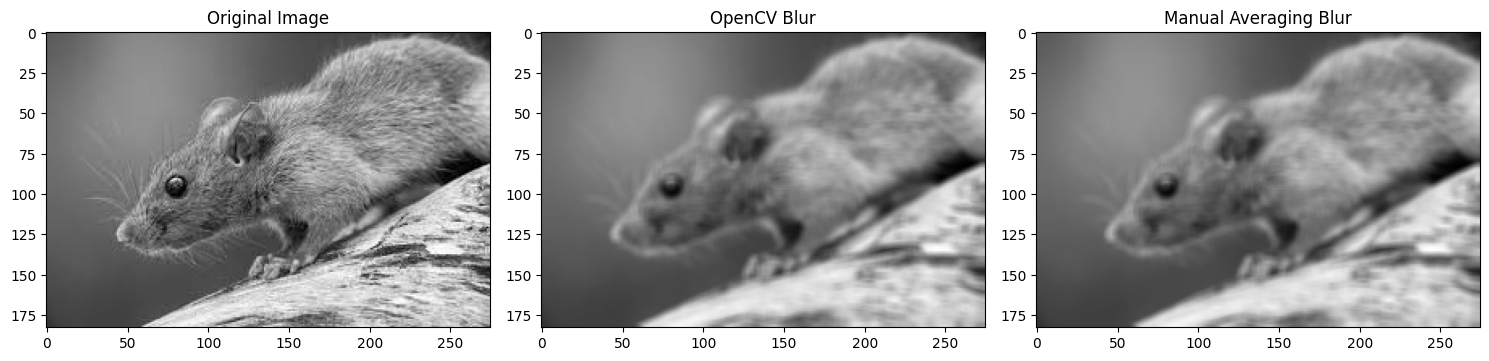

In [9]:
def manual_avg_blur(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size) #normalization


    h, w = image.shape
    pad = kernel_size // 2 #create pad to handle borders


    output = np.zeros_like(image, dtype=np.float32) #form the result


    padded_img = np.pad(image, ((pad, pad), (pad, pad)), mode='reflect') #use the pad to handle edge cases - corners and straight borders

    #convolve
    for i in range(h):
        for j in range(w):
            roi = padded_img[i:i+kernel_size, j:j+kernel_size] #this step captures a square of size 25 centered at every single pixel we consider
            output[i, j] = np.sum(roi * kernel) #for each patch, it performs element wise multiplication with the nxn kernel.

    return output.astype(np.uint8) #converts matrix to std image (256 pixel format)


manual_blurred = manual_avg_blur(image, 5) #derive the output for kernel size 5x5

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(avg_blurred, cmap='gray')
plt.title("OpenCV Blur")

plt.subplot(1, 3, 3)
plt.imshow(manual_blurred, cmap='gray')
plt.title("Manual Averaging Blur")

plt.tight_layout()
plt.show()

In [10]:
diff = cv2.absdiff(avg_blurred, manual_blurred)
print(f"Maximum difference between manual and OpenCV implementation: {np.max(diff)}")
print(f"Mean difference: {np.mean(diff)}")

Maximum difference between manual and OpenCV implementation: 1
Mean difference: 0.48625931445603576


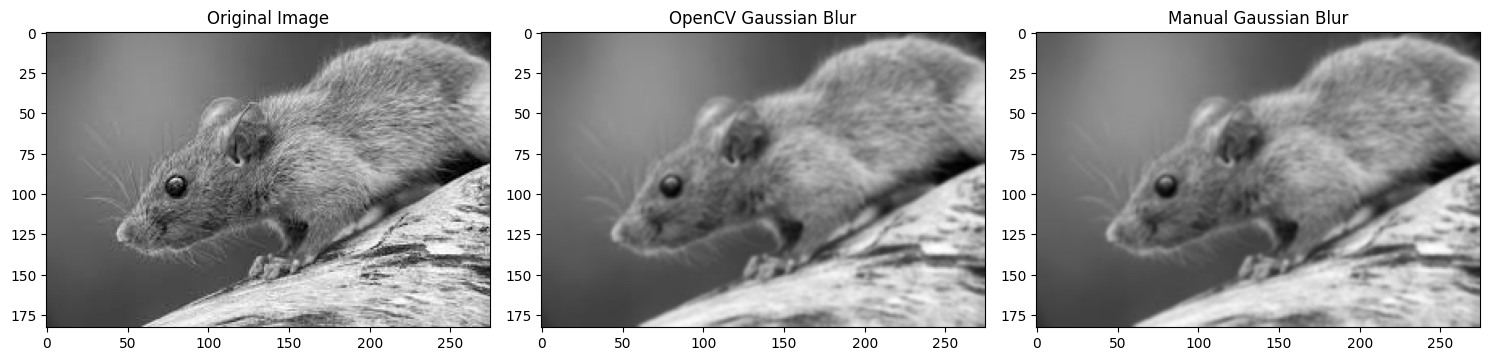

In [11]:
from scipy.ndimage import gaussian_filter
gauss_blurred_cv = cv2.GaussianBlur(image, (5, 5), sigmaX=1)

# Manual implementation of Gaussian blur
def manual_gaussian_blur(image, kernel_size, sigma):
    # creating kernel
    k = kernel_size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    kernel = np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal

    # Normalize the kernel
    kernel = kernel / kernel.sum()

    # Get dimensions
    h, w = image.shape
    pad = kernel_size // 2

    # Create output image
    output = np.zeros_like(image, dtype=np.float32)

    # handling borders using padding
    padded_img = np.pad(image, ((pad, pad), (pad, pad)), mode='reflect')

    # Perform convolution
    for i in range(h):
        for j in range(w):
            # Extract region of interest
            roi = padded_img[i:i+kernel_size, j:j+kernel_size]
            # Apply kernel
            output[i, j] = np.sum(roi * kernel)

    return output.astype(np.uint8)

# Apply manual Gaussian blur
manual_gauss_blurred = manual_gaussian_blur(image, 5, sigma=1)

# Display results side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(gauss_blurred_cv, cmap='gray')
plt.title("OpenCV Gaussian Blur")

plt.subplot(1, 3, 3)
plt.imshow(manual_gauss_blurred, cmap='gray')
plt.title("Manual Gaussian Blur")

plt.tight_layout()
plt.show()


In [12]:
diff = cv2.absdiff(gauss_blurred_cv, manual_gauss_blurred)
print(f"Maximum difference between manual and OpenCV Gaussian blur: {np.max(diff)}")
print(f"Mean difference: {np.mean(diff)}")


Maximum difference between manual and OpenCV Gaussian blur: 1
Mean difference: 0.49152508693492303


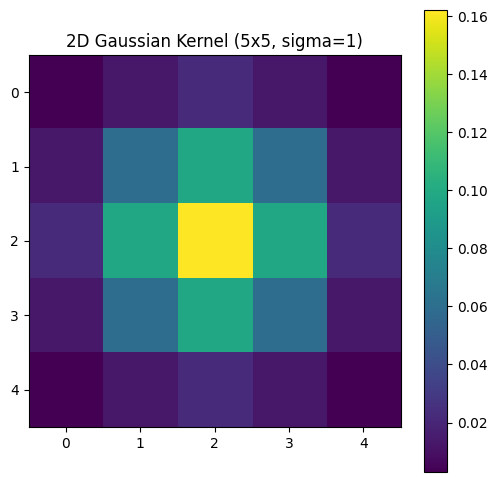

In [13]:
plt.figure(figsize=(6, 6))
k = 5 // 2
x, y = np.mgrid[-k:k+1, -k:k+1]
normal = 1 / (2.0 * np.pi * 1**2)
kernel = np.exp(-((x**2 + y**2) / (2.0 * 1**2))) * normal
kernel = kernel / kernel.sum()

plt.imshow(kernel, cmap='viridis')
plt.colorbar()
plt.title("2D Gaussian Kernel (5x5, sigma=1)")
plt.show()

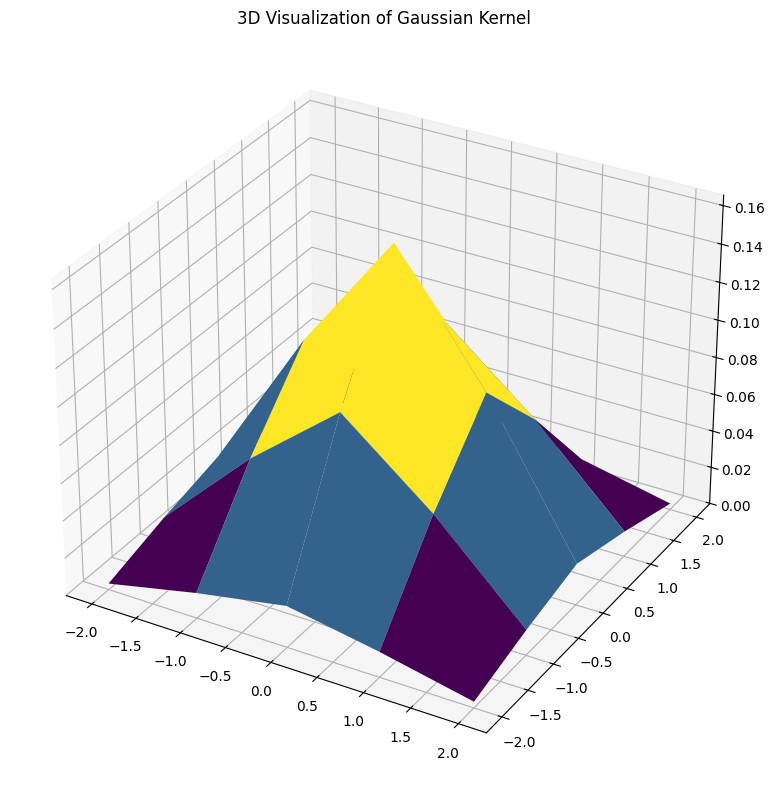

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
x, y = np.mgrid[-k:k+1, -k:k+1]
ax.plot_surface(x, y, kernel, cmap='viridis')
ax.set_title("3D Visualization of Gaussian Kernel")
plt.tight_layout()
plt.show()

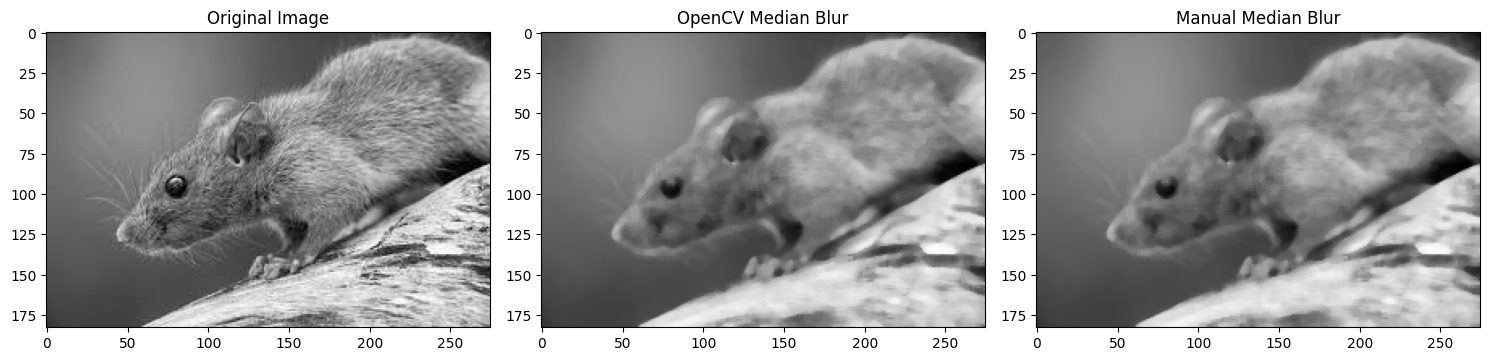

In [15]:
median_blurred_cv = cv2.medianBlur(image, 5)

# Manual implementation of median blur
def manual_median_blur(image, kernel_size):
    # Get dimensions
    h, w = image.shape
    pad = kernel_size // 2

    # Create output image
    output = np.zeros_like(image)

    # Pad the image to handle borders
    padded_img = np.pad(image, ((pad, pad), (pad, pad)), mode='reflect')

    # Perform median filtering
    for i in range(h):
        for j in range(w):
            # Extract region of interest
            roi = padded_img[i:i+kernel_size, j:j+kernel_size]
            # Find median value
            output[i, j] = np.median(roi)

    return output.astype(np.uint8)

# Apply manual median blur
manual_median_blurred = manual_median_blur(image, 5)

# Display results side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(median_blurred_cv, cmap='gray')
plt.title("OpenCV Median Blur")

plt.subplot(1, 3, 3)
plt.imshow(manual_median_blurred, cmap='gray')
plt.title("Manual Median Blur")

plt.tight_layout()
plt.show()

In [16]:
diff = cv2.absdiff(median_blurred_cv, manual_median_blurred)
print(f"Maximum difference between manual and OpenCV Median blur: {np.max(diff)}")
print(f"Mean difference: {np.mean(diff)}")

Maximum difference between manual and OpenCV Median blur: 84
Mean difference: 0.09357178340784898


Text(0.5, 1.0, 'Median Blur')

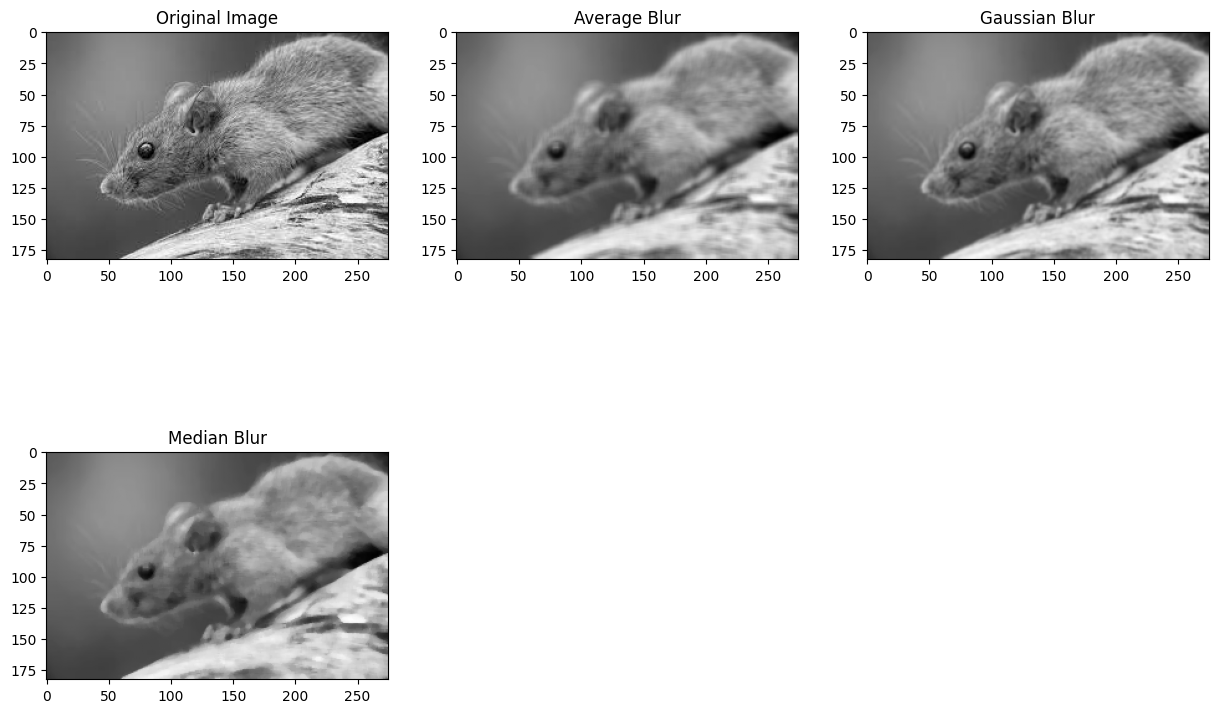

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(avg_blurred, cmap='gray')
plt.title("Average Blur")

plt.subplot(2, 3, 3)
plt.imshow(gauss_blurred_cv, cmap='gray')
plt.title("Gaussian Blur")

plt.subplot(2, 3, 4)
plt.imshow(median_blurred_cv, cmap='gray')
plt.title("Median Blur")

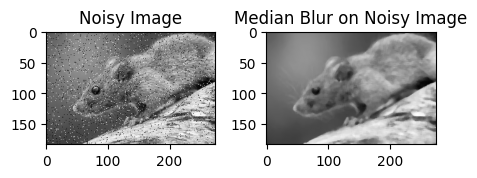

In [18]:
noisy_image = image.copy()
# Add salt-and-pepper noise (5% of pixels)
noise_mask = np.random.random(size=image.shape) < 0.05
salt_mask = np.random.random(size=image.shape) < 0.5
noisy_image[noise_mask & salt_mask] = 255  # salt
noisy_image[noise_mask & ~salt_mask] = 0   # pepper

plt.subplot(2, 3, 5)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")

plt.subplot(2, 3, 6)
plt.imshow(cv2.medianBlur(noisy_image, 5), cmap='gray')
plt.title("Median Blur on Noisy Image")

plt.tight_layout()
plt.show()

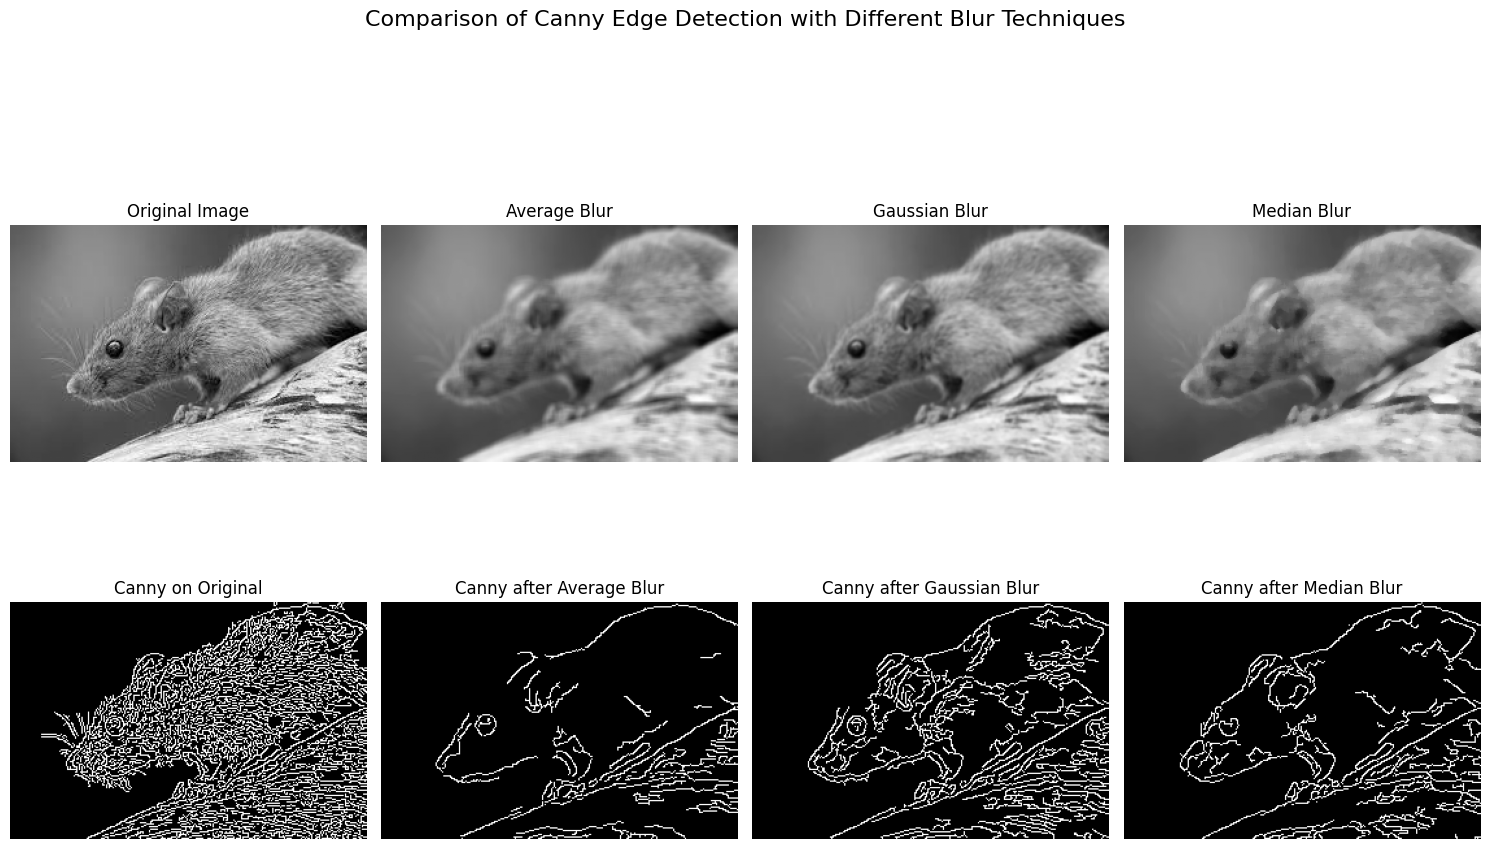

In [19]:
avg_blurred_edge = cv2.blur(image, (5, 5))
gauss_blurred_edge = cv2.GaussianBlur(image, (5, 5), sigmaX=1)
median_blurred_edge = cv2.medianBlur(image, 5)
low_threshold = 50
high_threshold = 150
canny_original = cv2.Canny(image, low_threshold, high_threshold)
canny_avg = cv2.Canny(avg_blurred_edge, low_threshold, high_threshold)
canny_gauss = cv2.Canny(gauss_blurred_edge, low_threshold, high_threshold)
canny_median = cv2.Canny(median_blurred_edge, low_threshold, high_threshold)
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(avg_blurred_edge, cmap='gray')
plt.title("Average Blur")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(gauss_blurred_edge, cmap='gray')
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(median_blurred_edge, cmap='gray')
plt.title("Median Blur")
plt.axis('off')

# Second row: Canny edge detection results
plt.subplot(2, 4, 5)
plt.imshow(canny_original, cmap='gray')
plt.title("Canny on Original")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(canny_avg, cmap='gray')
plt.title("Canny after Average Blur")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(canny_gauss, cmap='gray')
plt.title("Canny after Gaussian Blur")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(canny_median, cmap='gray')
plt.title("Canny after Median Blur")
plt.axis('off')

plt.tight_layout()
plt.suptitle("Comparison of Canny Edge Detection with Different Blur Techniques", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()